<a href="https://colab.research.google.com/github/khush3718/Real_Time_emotion_detection/blob/main/Emotion_Detection_Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Detection
## + Real-time



## Downloading dataset from Kaggle

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"meetposhia","key":"36c8f4e2575b17ab85b8f297fe165342"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ananthu017/emotion-detection-fer
! unzip emotion-detection-fer.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

## Imports

In [ ]:
# imports
import cv2
import glob
import skimage.transform as trans
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import save_model, Model, model_from_json, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications import VGG16
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
!pip install visualkeras
import visualkeras

## Initializing parameters

In [ ]:
# parameters
numClasses = 6
height = 48
width = 48
batchSize = 64

## Loading data
"disgusted" class excluded

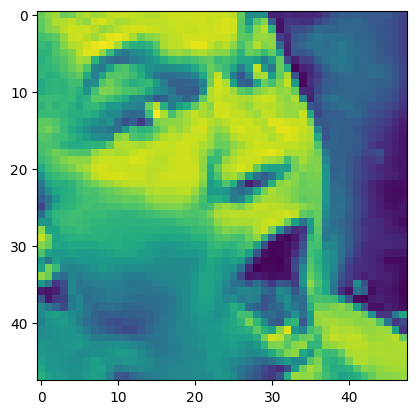

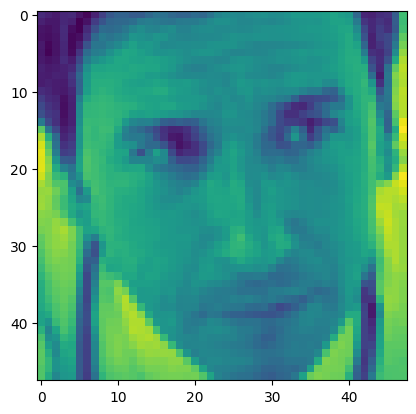

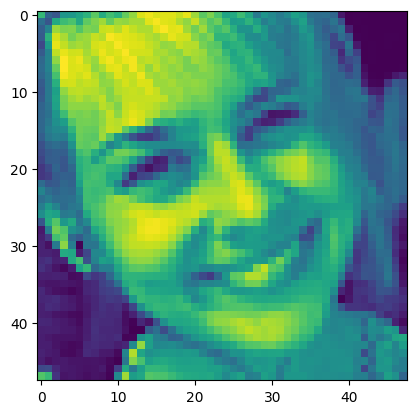

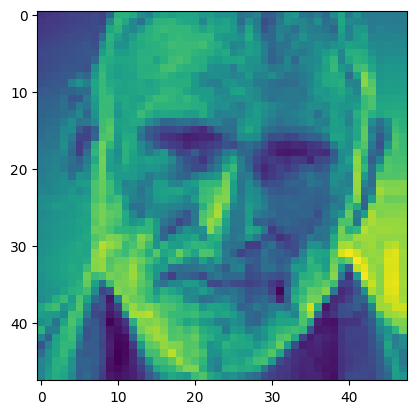

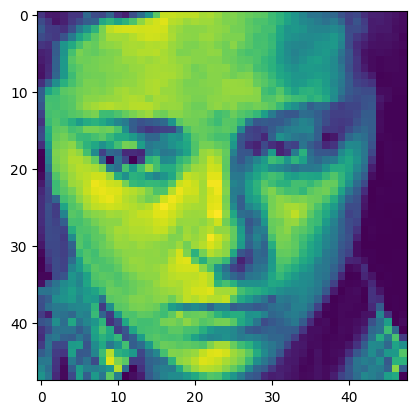

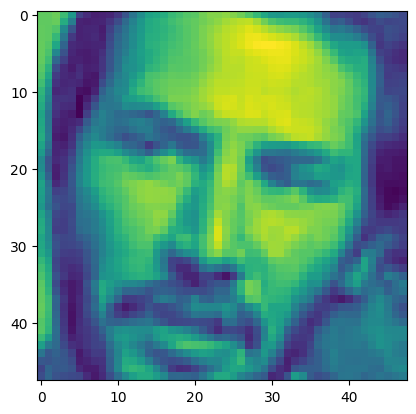

In [ ]:
# loading data
x_train = []
y_train = []
x_test = []
y_test = []

cnt = 0
for temp in ["angry", "fearful", "happy", "neutral", "sad", "surprised"]:
    if temp == "angry":
        label = 0
    elif temp == "fearful":
        label = 1
    elif temp == "happy":
        label = 2
    elif temp == "neutral":
        label = 3
    elif temp == "sad":
        label = 4
    elif temp == "surprised":
        label = 5
    #elif temp == "disgusted":
        #label = 6

    path = "/content/train/{}/".format(temp)
    images = glob.glob(path + "*.png")
    images.sort()
    for x in images:
       image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
       image = image / 255
       image = trans.resize(image,(height,width))
       y_train.append(label)
       x_train.append(image)

    path = "/content/test/{}/".format(temp)
    images = glob.glob(path + "*.png")
    images.sort()
    for x in images:
       image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
       image = image / 255
       image = trans.resize(image,(height,width))
       y_test.append(label)
       x_test.append(image)
    if cnt <= numClasses:
      plt.figure()
      plt.imshow(image)
    cnt += 1

## Preparing data

In [ ]:
# preparing data
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = np.reshape(x_train, (len(x_train), height, width, 1))
x_test = np.reshape(x_test, (len(x_test), height, width, 1))
y_train= to_categorical(y_train, num_classes=numClasses)
y_test = to_categorical(y_test, num_classes=numClasses)

## Model 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

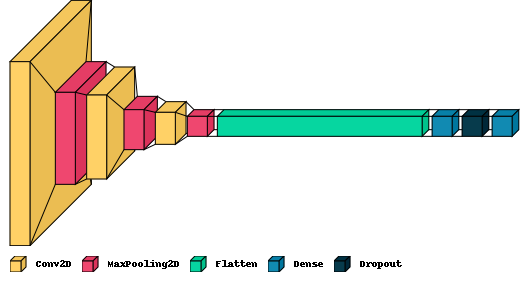

In [ ]:
def model1(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    print(model.summary())
    return model

model = model1((height,width,1), numClasses)
visualkeras.layered_view(model,legend=True, draw_volume=True)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    verbose=1,
                    batch_size=batchSize,
                    validation_data=(x_test, y_test))

Epoch 1/40
442/442 [==============================] - 16s 8ms/step - loss: 1.6649 - accuracy: 0.3137 - val_loss: 1.5055 - val_accuracy: 0.3996
Epoch 2/40
442/442 [==============================] - 3s 7ms/step - loss: 1.4538 - accuracy: 0.4245 - val_loss: 1.3485 - val_accuracy: 0.4721
Epoch 3/40
442/442 [==============================] - 3s 7ms/step - loss: 1.3443 - accuracy: 0.4752 - val_loss: 1.2890 - val_accuracy: 0.4890
Epoch 4/40
442/442 [==============================] - 4s 8ms/step - loss: 1.2747 - accuracy: 0.5055 - val_loss: 1.2403 - val_accuracy: 0.5139
Epoch 5/40
442/442 [==============================] - 3s 7ms/step - loss: 1.2195 - accuracy: 0.5263 - val_loss: 1.1877 - val_accuracy: 0.5346
Epoch 6/40
442/442 [==============================] - 3s 7ms/step - loss: 1.1736 - accuracy: 0.5469 - val_loss: 1.1624 - val_accuracy: 0.5493
Epoch 7/40
442/442 [==============================] - 3s 7ms/step - loss: 1.1336 - accuracy: 0.5642 - val_loss: 1.1646 - val_accuracy: 0.5390
Epoch

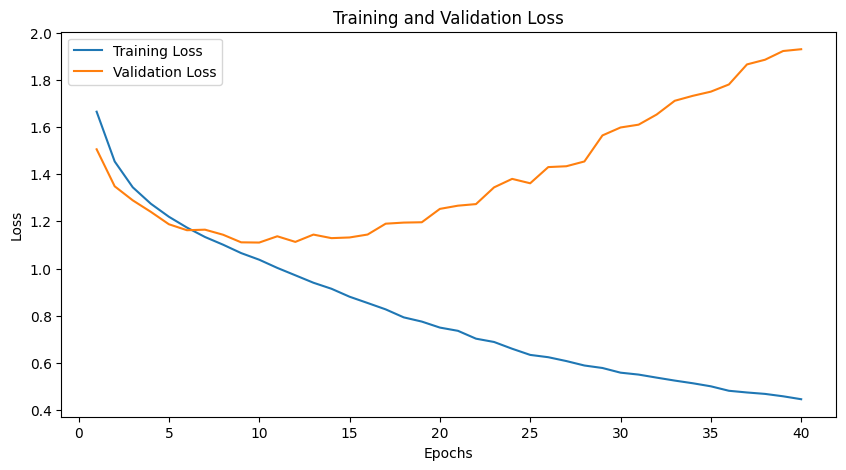

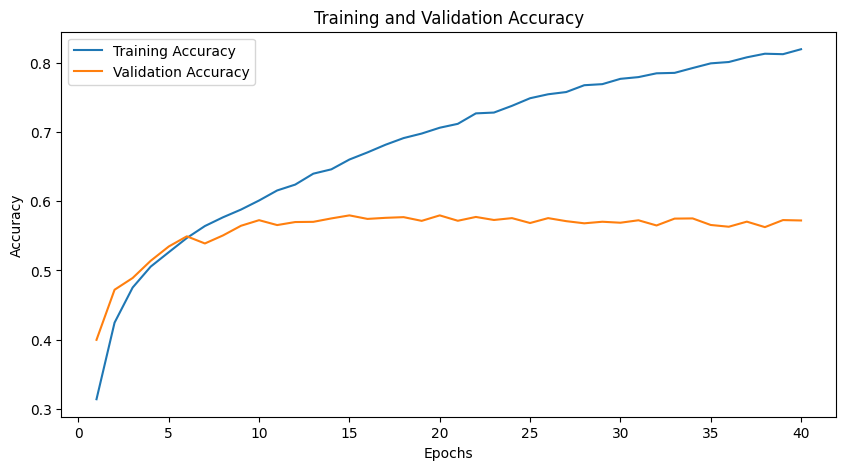

In [ ]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
model_json = model.to_json()
with open("model_arch1.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model1.h5")
print("Saved model to disk")

# Evaluate the model on test set
score = model.evaluate(x_test,
                       y_test,
                       verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

Saved model to disk

 Test accuracy: 0.5722371339797974


## Model 2

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 48, 48, 1)]       0         
                                                                 
 conv1_1 (Conv2D)            (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 conv1_2 (Conv2D)            (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 pool1_1 (MaxPooling2D)      (None, 24, 24, 64)        0     

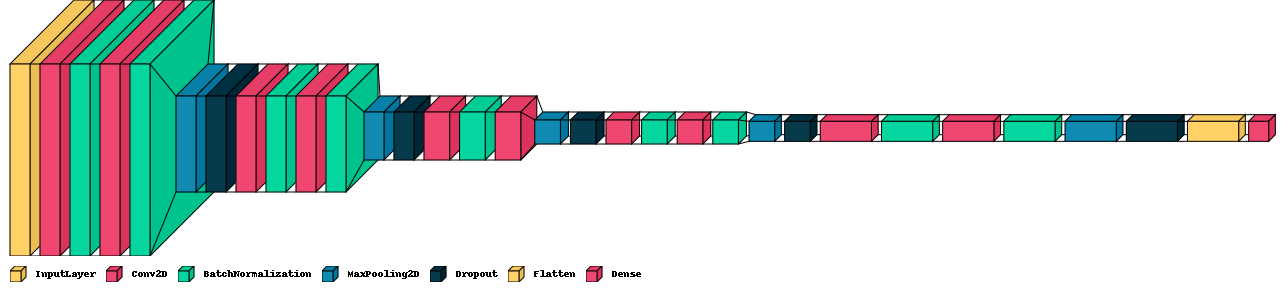

In [ ]:
def FER_Model(input_shape=(height,width,1)):
    # first input model
    visible = Input(shape=input_shape, name='input')
    #the 1-st block
    conv1_1 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1')(visible)
    conv1_1 = BatchNormalization()(conv1_1)
    conv1_2 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2')(conv1_1)
    conv1_2 = BatchNormalization()(conv1_2)
    pool1_1 = MaxPooling2D(pool_size=(2,2), name = 'pool1_1')(conv1_2)
    drop1_1 = Dropout(0.3, name = 'drop1_1')(pool1_1)#the 2-nd block
    conv2_1 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1')(drop1_1)
    conv2_1 = BatchNormalization()(conv2_1)
    conv2_2 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2')(conv2_1)
    conv2_2 = BatchNormalization()(conv2_2)
    pool2_1 = MaxPooling2D(pool_size=(2,2), name = 'pool2_1')(conv2_2)
    drop2_1 = Dropout(0.3, name = 'drop2_1')(pool2_1)#the 3-rd block
    conv3_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_1')(drop2_1)
    conv3_1 = BatchNormalization()(conv3_1)
    conv3_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_2')(conv3_1)
    pool3_1 = MaxPooling2D(pool_size=(2,2), name = 'pool3_1')(conv3_2)
    drop3_1 = Dropout(0.3, name = 'drop3_1')(pool3_1)#the 4-th block
    conv4_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1')(drop3_1)
    conv4_1 = BatchNormalization()(conv4_1)
    conv4_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2')(conv4_1)
    conv4_2 = BatchNormalization()(conv4_2)
    pool4_1 = MaxPooling2D(pool_size=(2,2), name = 'pool4_1')(conv4_2)
    drop4_1 = Dropout(0.3, name = 'drop4_1')(pool4_1)

    #the 5-th block
    conv5_1 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_1')(drop4_1)
    conv5_1 = BatchNormalization()(conv5_1)
    conv5_2 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_2')(conv5_1)
    conv5_2 = BatchNormalization()(conv5_2)
    pool5_1 = MaxPooling2D(pool_size=(2,2), name = 'pool5_1')(conv5_2)
    drop5_1 = Dropout(0.3, name = 'drop5_1')(pool5_1)#Flatten and output
    flatten = Flatten(name = 'flatten')(drop5_1)
    ouput = Dense(numClasses, activation='softmax', name = 'output')(flatten)# create model
    model = Model(inputs =visible, outputs = ouput)
    # summary layers
    print(model.summary())

    return model
model = FER_Model()
opt = Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
visualkeras.layered_view(model,legend=True, draw_volume=True)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    verbose=1,
                    batch_size=batchSize,
                    validation_data=(x_test, y_test))

Epoch 1/40
442/442 [==============================] - 35s 65ms/step - loss: 2.0671 - accuracy: 0.2956 - val_loss: 1.7499 - val_accuracy: 0.3127
Epoch 2/40
442/442 [==============================] - 26s 58ms/step - loss: 1.4026 - accuracy: 0.4482 - val_loss: 1.2708 - val_accuracy: 0.4914
Epoch 3/40
442/442 [==============================] - 26s 58ms/step - loss: 1.2126 - accuracy: 0.5250 - val_loss: 1.1951 - val_accuracy: 0.5240
Epoch 4/40
442/442 [==============================] - 27s 62ms/step - loss: 1.1157 - accuracy: 0.5678 - val_loss: 1.2076 - val_accuracy: 0.5364
Epoch 5/40
442/442 [==============================] - 26s 59ms/step - loss: 1.0567 - accuracy: 0.5931 - val_loss: 1.1797 - val_accuracy: 0.5574
Epoch 6/40
442/442 [==============================] - 27s 61ms/step - loss: 1.0072 - accuracy: 0.6105 - val_loss: 1.0672 - val_accuracy: 0.5837
Epoch 7/40
442/442 [==============================] - 27s 61ms/step - loss: 0.9548 - accuracy: 0.6324 - val_loss: 1.0476 - val_accuracy:

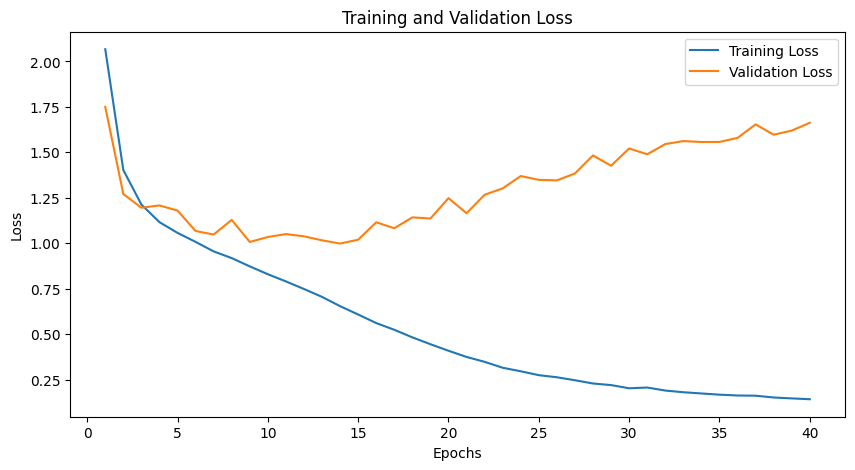

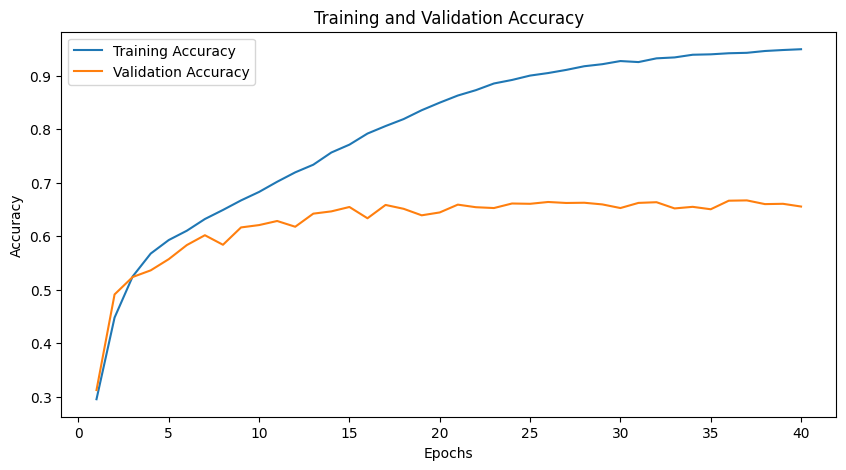

In [ ]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
model_json = model.to_json()
with open("model_arch2.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model2.h5")
print("Saved model to disk")

# Evaluate the model on test set
score = model.evaluate(x_test,
                       y_test,
                       verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

Saved model to disk

 Test accuracy: 0.6557238101959229


## Model 3

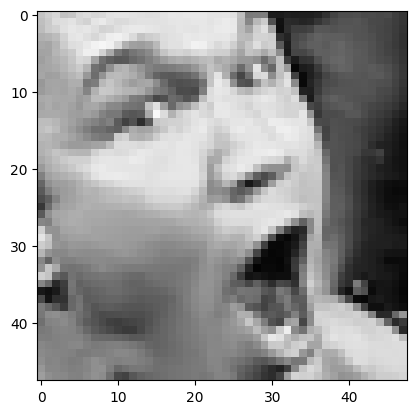

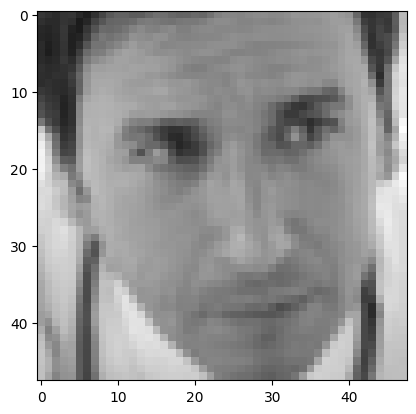

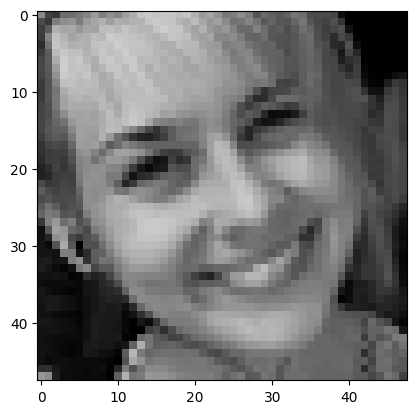

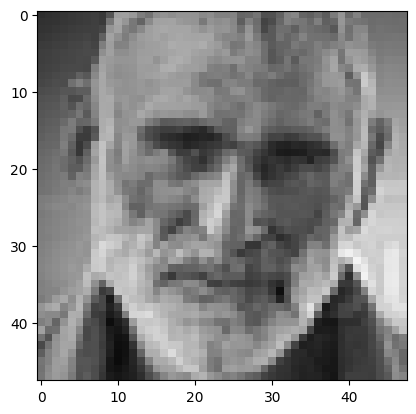

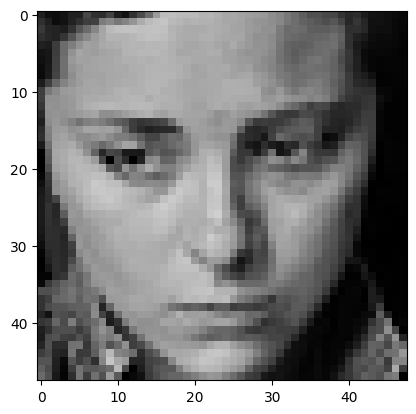

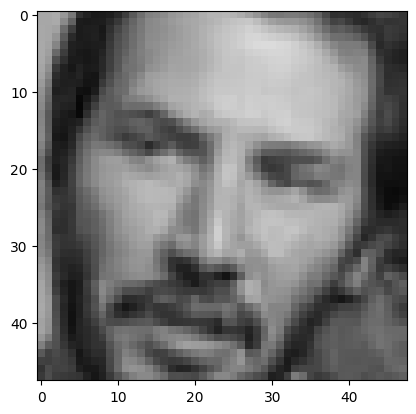

In [ ]:
# loading data
x_train = []
y_train = []
x_test = []
y_test = []

cnt = 0
for temp in ["angry", "fearful", "happy", "neutral", "sad", "surprised"]:
    if temp == "angry":
        label = 0
    elif temp == "fearful":
        label = 1
    elif temp == "happy":
        label = 2
    elif temp == "neutral":
        label = 3
    elif temp == "sad":
        label = 4
    elif temp == "surprised":
        label = 5
    #elif temp == "disgusted":
        #label = 6

    path = "/content/train/{}/".format(temp)
    images = glob.glob(path + "*.png")
    images.sort()
    for x in images:
       image = cv2.imread(x)
       image = image / 255
       image = trans.resize(image,(height,width))
       y_train.append(label)
       x_train.append(image)

    path = "/content/test/{}/".format(temp)
    images = glob.glob(path + "*.png")
    images.sort()
    for x in images:
       image = cv2.imread(x)
       image = image / 255
       image = trans.resize(image,(height,width))
       y_test.append(label)
       x_test.append(image)
    if cnt <= numClasses:
      plt.figure()
      plt.imshow(image)
    cnt += 1

# preparing data
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = np.reshape(x_train, (len(x_train), height, width, 3))
x_test = np.reshape(x_test, (len(x_test), height, width, 3))
y_train= to_categorical(y_train, num_classes=numClasses)
y_test = to_categorical(y_test, num_classes=numClasses)

58889256/58889256 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

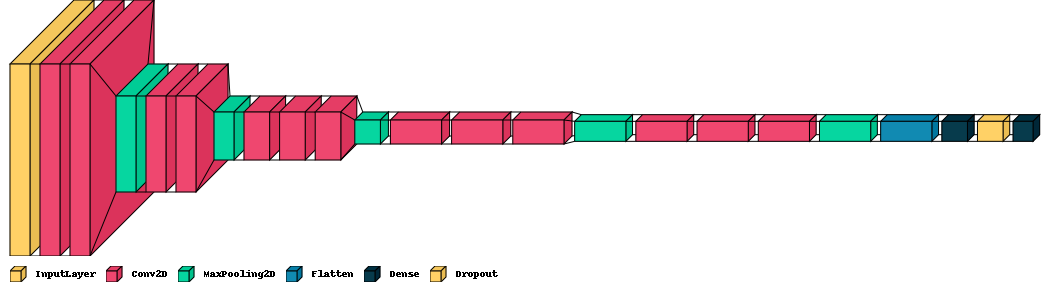

In [ ]:
def model3(input_shape, num_classes):
  model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
  # Freeze the pre-trained layers to avoid overfitting
  for layer in model.layers:
      layer.trainable = False

  # Add custom classification head on top of VGG
  x = Flatten()(model.output)
  x = Dense(256, activation='relu')(x)
  x = Dropout(0.5)(x)
  predictions = Dense(num_classes, activation='softmax')(x)

  new_model = Model(inputs=model.input, outputs=predictions)
  new_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

  return new_model

model = model3((height,width,3), numClasses)
print(model.summary())
visualkeras.layered_view(model,legend=True, draw_volume=True)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    verbose=1,
                    batch_size=batchSize,
                    validation_data=(x_test, y_test))

Epoch 1/40
442/442 [==============================] - 23s 27ms/step - loss: 1.6246 - accuracy: 0.3361 - val_loss: 1.5214 - val_accuracy: 0.4006
Epoch 2/40
442/442 [==============================] - 11s 24ms/step - loss: 1.5411 - accuracy: 0.3838 - val_loss: 1.4901 - val_accuracy: 0.4084
Epoch 3/40
442/442 [==============================] - 11s 25ms/step - loss: 1.5135 - accuracy: 0.3997 - val_loss: 1.4772 - val_accuracy: 0.4098
Epoch 4/40
442/442 [==============================] - 11s 24ms/step - loss: 1.4897 - accuracy: 0.4093 - val_loss: 1.4646 - val_accuracy: 0.4140
Epoch 5/40
442/442 [==============================] - 10s 23ms/step - loss: 1.4738 - accuracy: 0.4180 - val_loss: 1.4633 - val_accuracy: 0.4254
Epoch 6/40
442/442 [==============================] - 11s 26ms/step - loss: 1.4578 - accuracy: 0.4240 - val_loss: 1.4485 - val_accuracy: 0.4266
Epoch 7/40
442/442 [==============================] - 11s 25ms/step - loss: 1.4435 - accuracy: 0.4325 - val_loss: 1.4430 - val_accuracy:

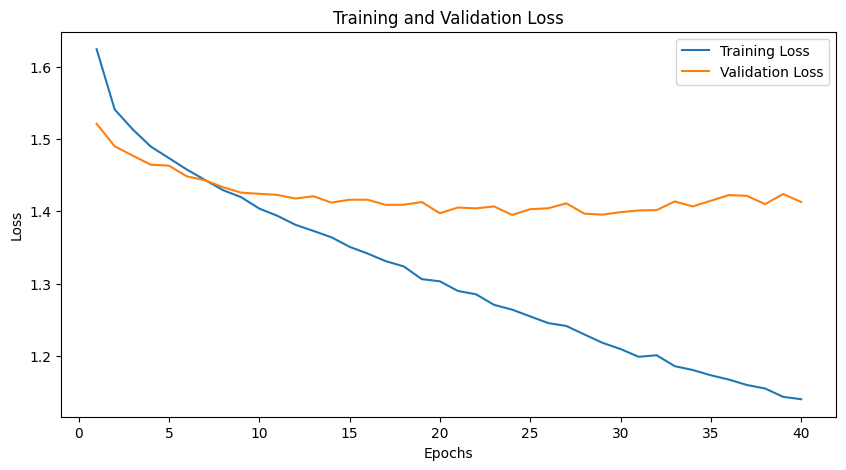

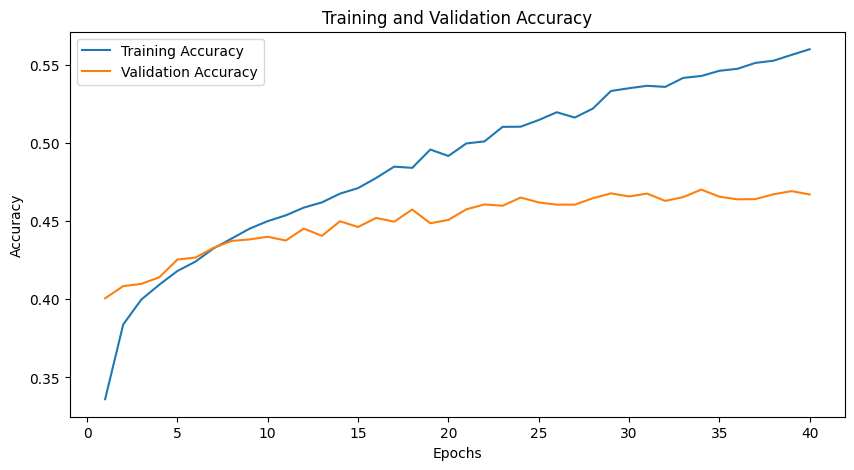

In [ ]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
model_json = model.to_json()
with open("model_arch3.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model3.h5")
print("Saved model to disk")

# Evaluate the model on test set
score = model.evaluate(x_test,
                       y_test,
                       verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

Saved model to disk

 Test accuracy: 0.4632800221443176


## Using Data Generator

### Initializing parameters

In [ ]:
# parameters
numClasses = 7
height = 48
width = 48
batchSize = 64

### Loading data


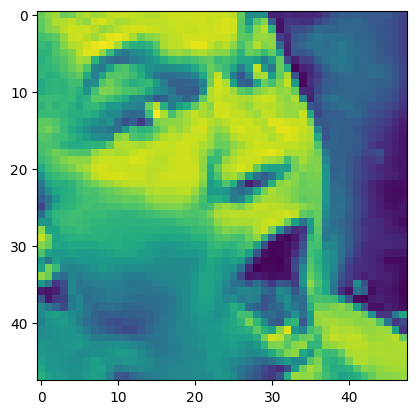

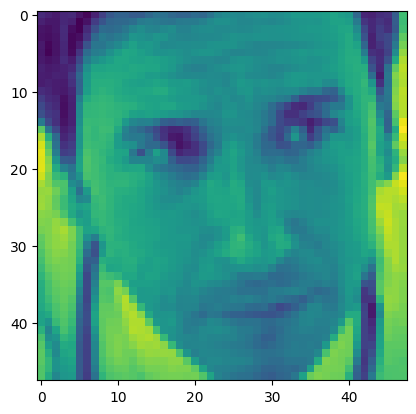

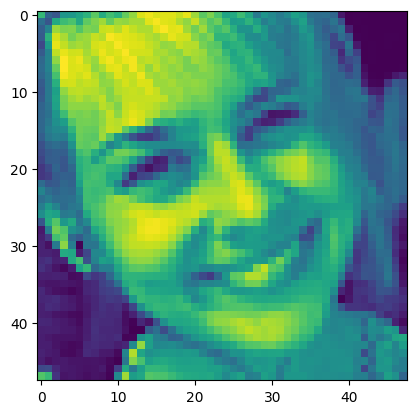

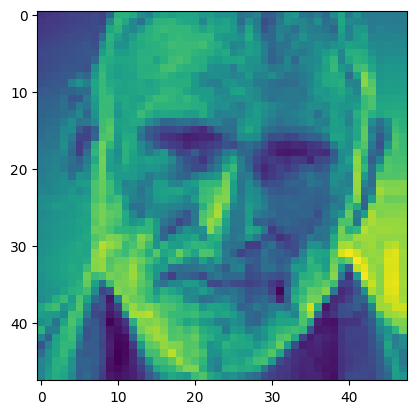

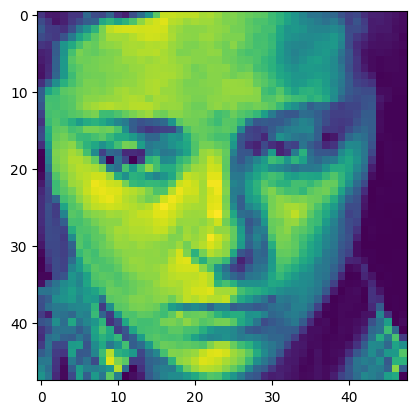

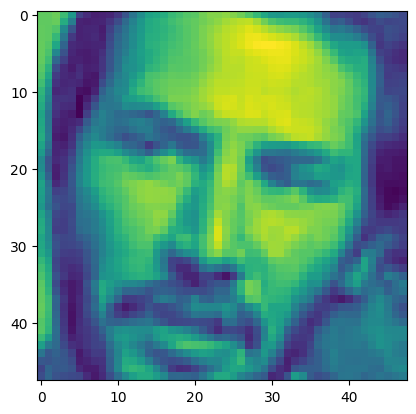

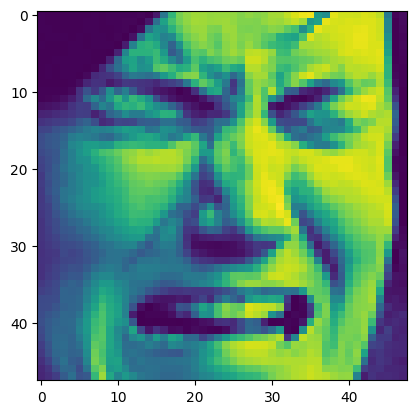

In [ ]:
# loading data
x_train = []
y_train = []
x_test = []
y_test = []

cnt = 0
for temp in ["angry", "fearful", "happy", "neutral", "sad", "surprised", "disgusted"]:
    if temp == "angry":
        label = 0
    elif temp == "fearful":
        label = 1
    elif temp == "happy":
        label = 2
    elif temp == "neutral":
        label = 3
    elif temp == "sad":
        label = 4
    elif temp == "surprised":
        label = 5
    elif temp == "disgusted":
        label = 6

    path = "/content/train/{}/".format(temp)
    images = glob.glob(path + "*.png")
    images.sort()
    for x in images:
       image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
       image = image / 255
       image = trans.resize(image,(height,width))
       y_train.append(label)
       x_train.append(image)

    path = "/content/test/{}/".format(temp)
    images = glob.glob(path + "*.png")
    images.sort()
    for x in images:
       image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
       image = image / 255
       image = trans.resize(image,(height,width))
       y_test.append(label)
       x_test.append(image)
    if cnt <= numClasses:
      plt.figure()
      plt.imshow(image)
    cnt += 1

### Preparing data

In [ ]:
# preparing data
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = np.reshape(x_train, (len(x_train), height, width, 1))
x_test = np.reshape(x_test, (len(x_test), height, width, 1))
y_train= to_categorical(y_train, num_classes=numClasses)
y_test = to_categorical(y_test, num_classes=numClasses)

### Data Generator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')

testgen = ImageDataGenerator()

In [ ]:
datagen.fit(x_train)

In [ ]:
train_flow = datagen.flow(x_train, y_train, batch_size=batchSize)
test_flow = testgen.flow(x_test, y_test, batch_size=batchSize)

## Model 1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 128)        

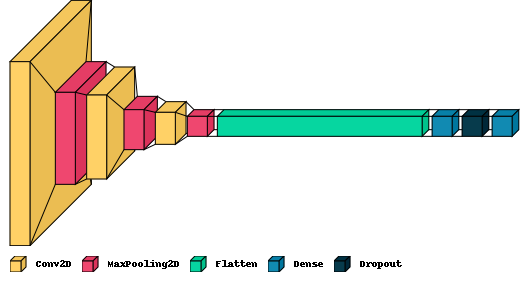

In [ ]:
def model1(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    print(model.summary())
    return model

model = model1((height,width,1), numClasses)
visualkeras.layered_view(model,legend=True, draw_volume=True)

In [ ]:
history = model.fit_generator(train_flow,
                              steps_per_epoch=len(x_train)/batchSize,
                              epochs=100,
                              verbose=1,
                              validation_data=test_flow)

Epoch 1/100


<ipython-input-16-0da63cd07453>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_flow,


448/448 [==============================] - 19s 31ms/step - loss: 1.8052 - accuracy: 0.2497 - val_loss: 1.7113 - val_accuracy: 0.3137
Epoch 2/100
448/448 [==============================] - 13s 30ms/step - loss: 1.6978 - accuracy: 0.3174 - val_loss: 1.5279 - val_accuracy: 0.4082
Epoch 3/100
448/448 [==============================] - 15s 34ms/step - loss: 1.5702 - accuracy: 0.3865 - val_loss: 1.4283 - val_accuracy: 0.4546
Epoch 4/100
448/448 [==============================] - 14s 32ms/step - loss: 1.4821 - accuracy: 0.4250 - val_loss: 1.3717 - val_accuracy: 0.4684
Epoch 5/100
448/448 [==============================] - 13s 29ms/step - loss: 1.4227 - accuracy: 0.4522 - val_loss: 1.2999 - val_accuracy: 0.5070
Epoch 6/100
448/448 [==============================] - 13s 30ms/step - loss: 1.3856 - accuracy: 0.4685 - val_loss: 1.3140 - val_accuracy: 0.5021
Epoch 7/100
448/448 [==============================] - 13s 30ms/step - loss: 1.3703 - accuracy: 0.4744 - val_loss: 1.2435 - val_accuracy: 0.52

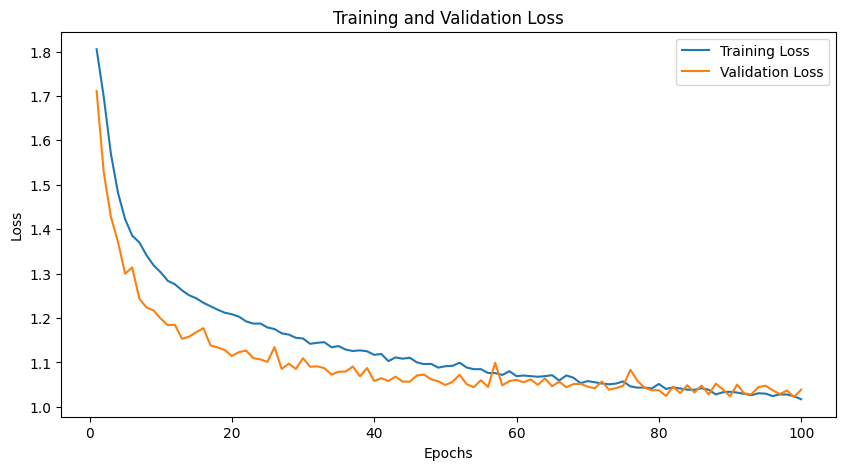

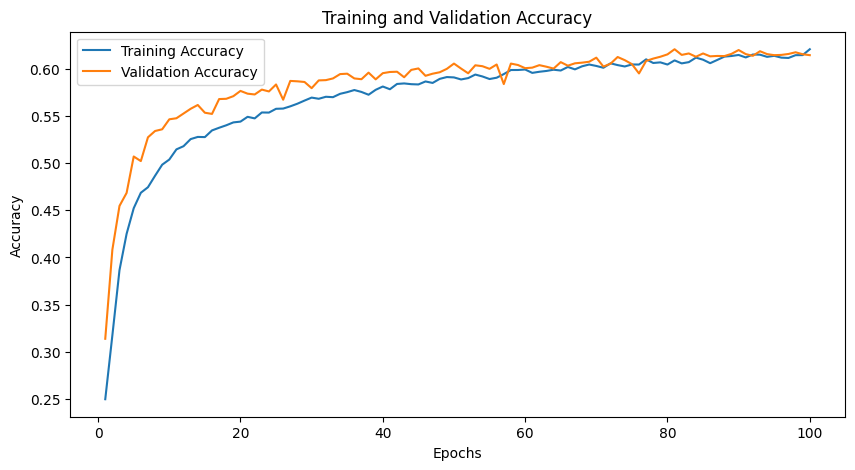

In [ ]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
model_json = model.to_json()
with open("model_arch1.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model1.h5")
print("Saved model to disk")

# Evaluate the model on test set
score = model.evaluate(x_test,
                       y_test,
                       verbose=0)

y_pred = model.predict(x_test)
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Print test loss
print('\nTest loss:', score[0])
# Print test accuracy
print('\n', 'Test accuracy:', score[1])

Saved model to disk
225/225 [==============================] - 1s 2ms/step
Confusion Matrix:
[[ 542   70   37  162   97   42    8]
 [ 142  271   54  221  187  143    6]
 [  49   23 1516  109   31   44    2]
 [  74   38   96  877  123   23    2]
 [ 151  110   75  357  522   28    4]
 [  33   46   47   39   16  650    0]
 [  53    6    3    6    7    4   32]]

Test loss: 1.0389065742492676

 Test accuracy: 0.6143772602081299


<Figure size 640x480 with 0 Axes>

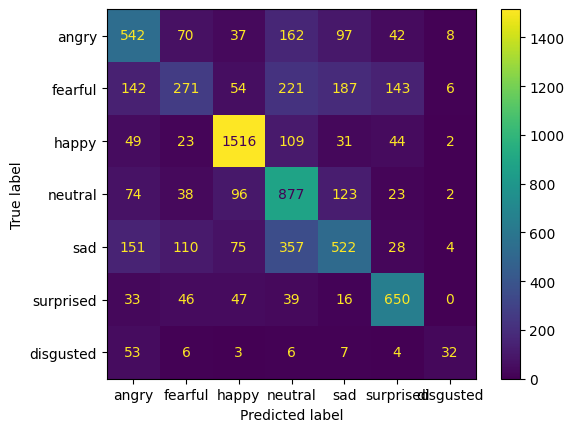

In [ ]:
plt.figure()
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["angry", "fearful", "happy", "neutral", "sad", "surprised", "disgusted"])
disp.plot()
plt.show()

## Model 2

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 48, 48, 1)]       0         
                                                                 
 conv1_1 (Conv2D)            (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 conv1_2 (Conv2D)            (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 pool1_1 (MaxPooling2D)      (None, 24, 24, 64)        0     

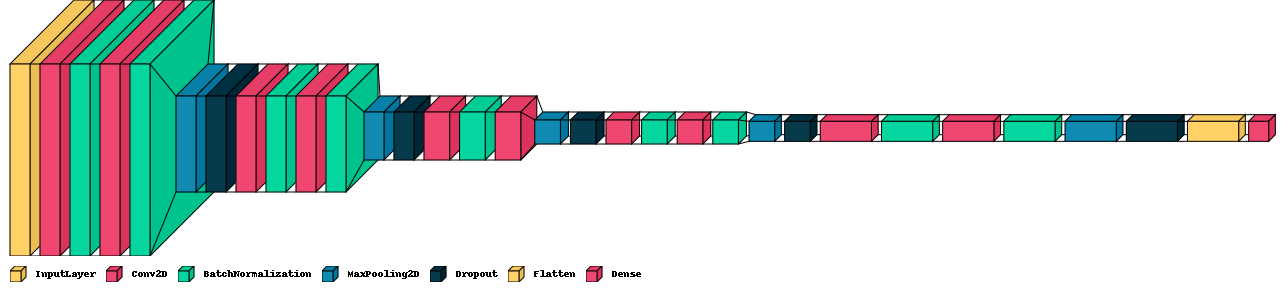

In [ ]:
def FER_Model(input_shape=(height,width,1)):
    # first input model
    visible = Input(shape=input_shape, name='input')
    #the 1-st block
    conv1_1 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1')(visible)
    conv1_1 = BatchNormalization()(conv1_1)
    conv1_2 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2')(conv1_1)
    conv1_2 = BatchNormalization()(conv1_2)
    pool1_1 = MaxPooling2D(pool_size=(2,2), name = 'pool1_1')(conv1_2)
    drop1_1 = Dropout(0.3, name = 'drop1_1')(pool1_1)#the 2-nd block
    conv2_1 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1')(drop1_1)
    conv2_1 = BatchNormalization()(conv2_1)
    conv2_2 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2')(conv2_1)
    conv2_2 = BatchNormalization()(conv2_2)
    pool2_1 = MaxPooling2D(pool_size=(2,2), name = 'pool2_1')(conv2_2)
    drop2_1 = Dropout(0.3, name = 'drop2_1')(pool2_1)#the 3-rd block
    conv3_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_1')(drop2_1)
    conv3_1 = BatchNormalization()(conv3_1)
    conv3_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_2')(conv3_1)
    pool3_1 = MaxPooling2D(pool_size=(2,2), name = 'pool3_1')(conv3_2)
    drop3_1 = Dropout(0.3, name = 'drop3_1')(pool3_1)#the 4-th block
    conv4_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1')(drop3_1)
    conv4_1 = BatchNormalization()(conv4_1)
    conv4_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2')(conv4_1)
    conv4_2 = BatchNormalization()(conv4_2)
    pool4_1 = MaxPooling2D(pool_size=(2,2), name = 'pool4_1')(conv4_2)
    drop4_1 = Dropout(0.3, name = 'drop4_1')(pool4_1)

    #the 5-th block
    conv5_1 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_1')(drop4_1)
    conv5_1 = BatchNormalization()(conv5_1)
    conv5_2 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_2')(conv5_1)
    conv5_2 = BatchNormalization()(conv5_2)
    pool5_1 = MaxPooling2D(pool_size=(2,2), name = 'pool5_1')(conv5_2)
    drop5_1 = Dropout(0.3, name = 'drop5_1')(pool5_1)#Flatten and output
    flatten = Flatten(name = 'flatten')(drop5_1)
    ouput = Dense(numClasses, activation='softmax', name = 'output')(flatten)# create model
    model = Model(inputs =visible, outputs = ouput)
    # summary layers
    print(model.summary())

    return model
model = FER_Model()
opt = Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
visualkeras.layered_view(model,legend=True, draw_volume=True)

In [ ]:
history = model.fit_generator(train_flow,
                              steps_per_epoch=len(x_train)/batchSize,
                              epochs=45,
                              verbose=1,
                              validation_data=test_flow)

Epoch 1/45


<ipython-input-21-b4e4c949b6fe>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_flow,


448/448 [==============================] - 36s 64ms/step - loss: 2.1508 - accuracy: 0.2638 - val_loss: 1.7382 - val_accuracy: 0.2641
Epoch 2/45
448/448 [==============================] - 27s 61ms/step - loss: 1.6065 - accuracy: 0.4005 - val_loss: 1.3644 - val_accuracy: 0.4696
Epoch 3/45
448/448 [==============================] - 28s 63ms/step - loss: 1.3545 - accuracy: 0.4759 - val_loss: 1.5134 - val_accuracy: 0.4246
Epoch 4/45
448/448 [==============================] - 28s 62ms/step - loss: 1.2467 - accuracy: 0.5187 - val_loss: 1.2285 - val_accuracy: 0.5325
Epoch 5/45
448/448 [==============================] - 28s 62ms/step - loss: 1.1920 - accuracy: 0.5458 - val_loss: 1.3514 - val_accuracy: 0.4923
Epoch 6/45
448/448 [==============================] - 28s 62ms/step - loss: 1.1459 - accuracy: 0.5619 - val_loss: 1.1571 - val_accuracy: 0.5723
Epoch 7/45
448/448 [==============================] - 28s 62ms/step - loss: 1.1166 - accuracy: 0.5796 - val_loss: 1.1022 - val_accuracy: 0.5768
Epo

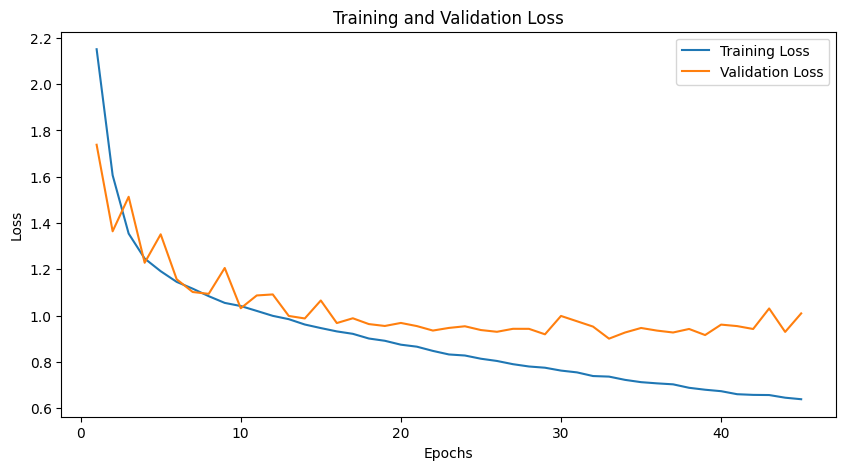

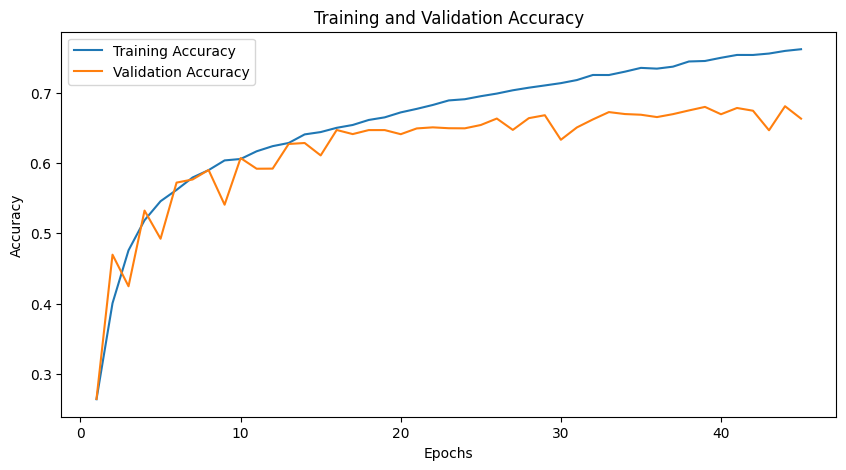

In [ ]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
model_json = model.to_json()
with open("model_arch2.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model2.h5")
print("Saved model to disk")

# Evaluate the model on test set
score = model.evaluate(x_test,
                       y_test,
                       verbose=0)

y_pred = model.predict(x_test)
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Print test loss
print('\nTest loss:', score[0])
# Print test accuracy
print('\n', 'Test accuracy:', score[1])

Saved model to disk
225/225 [==============================] - 2s 7ms/step
Confusion Matrix:
[[ 571   65   29  150   82   46   15]
 [ 131  448   18  171  128  121    7]
 [  40   20 1513  128   12   59    2]
 [  52   47   59  959   66   47    3]
 [ 117  136   54  403  498   37    2]
 [  23   50   27   17    6  708    0]
 [  20    6    1    9    7    3   65]]

 Test accuracy: 0.6634159684181213


<Figure size 640x480 with 0 Axes>

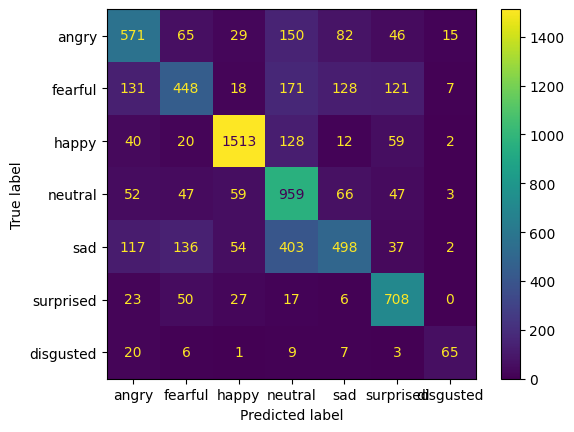

In [ ]:
plt.figure()
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["angry", "fearful", "happy", "neutral", "sad", "surprised", "disgusted"])
disp.plot()
plt.show()

## Model 3

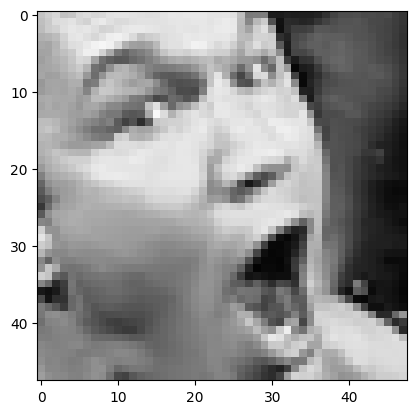

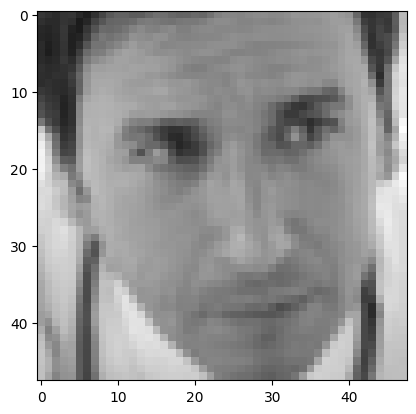

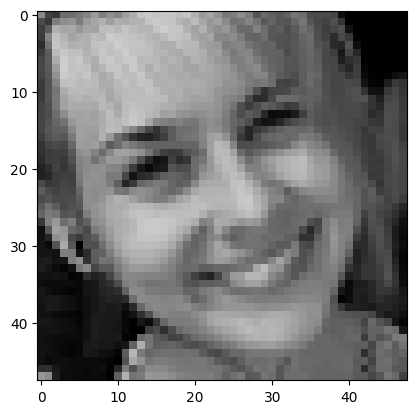

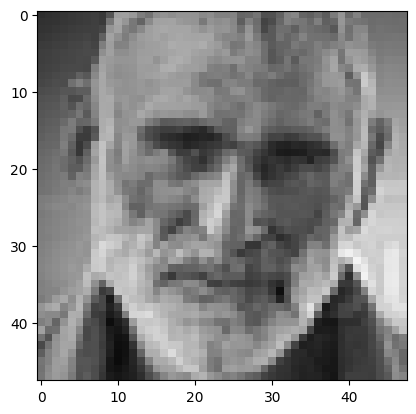

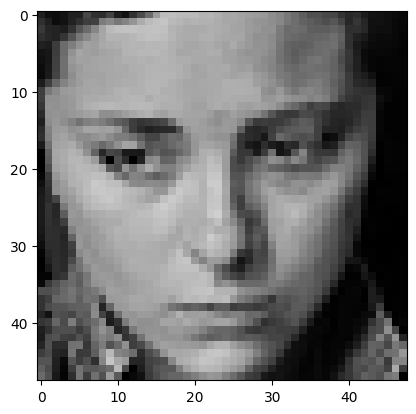

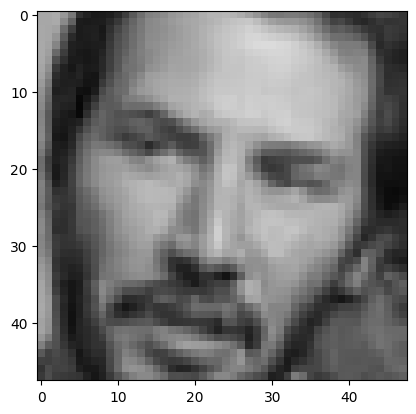

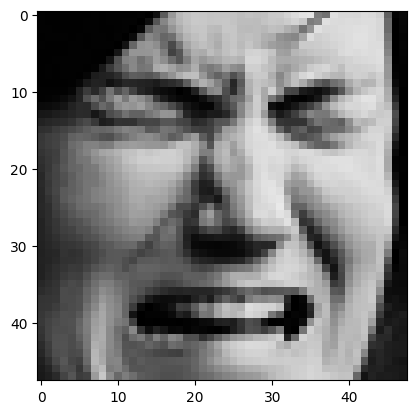

In [ ]:
# loading data
x_train = []
y_train = []
x_test = []
y_test = []

cnt = 0
for temp in ["angry", "fearful", "happy", "neutral", "sad", "surprised", "disgusted"]:
    if temp == "angry":
        label = 0
    elif temp == "fearful":
        label = 1
    elif temp == "happy":
        label = 2
    elif temp == "neutral":
        label = 3
    elif temp == "sad":
        label = 4
    elif temp == "surprised":
        label = 5
    elif temp == "disgusted":
        label = 6

    path = "/content/train/{}/".format(temp)
    images = glob.glob(path + "*.png")
    images.sort()
    for x in images:
       image = cv2.imread(x)
       image = image / 255
       image = trans.resize(image,(height,width))
       y_train.append(label)
       x_train.append(image)

    path = "/content/test/{}/".format(temp)
    images = glob.glob(path + "*.png")
    images.sort()
    for x in images:
       image = cv2.imread(x)
       image = image / 255
       image = trans.resize(image,(height,width))
       y_test.append(label)
       x_test.append(image)
    if cnt <= numClasses:
      plt.figure()
      plt.imshow(image)
    cnt += 1

# preparing data
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = np.reshape(x_train, (len(x_train), height, width, 3))
x_test = np.reshape(x_test, (len(x_test), height, width, 3))
y_train= to_categorical(y_train, num_classes=numClasses)
y_test = to_categorical(y_test, num_classes=numClasses)

### Data Generator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')

testgen = ImageDataGenerator()

In [ ]:
datagen.fit(x_train)

In [ ]:
train_flow = datagen.flow(x_train, y_train, batch_size=batchSize)
test_flow = testgen.flow(x_test, y_test, batch_size=batchSize)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

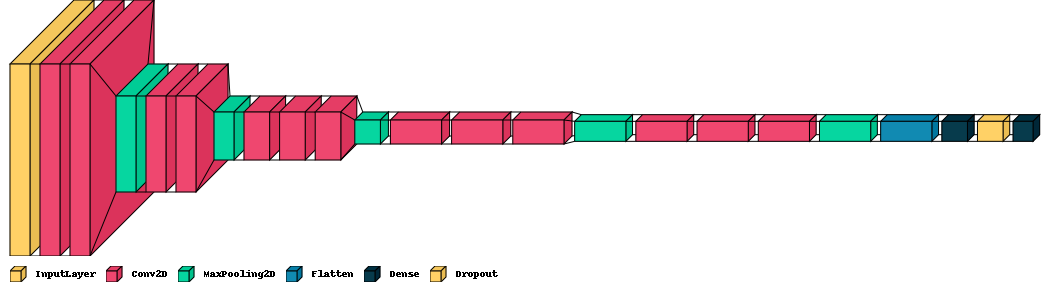

In [ ]:
def model3(input_shape, num_classes):
  model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
  # Freeze the pre-trained layers to avoid overfitting
  for layer in model.layers:
      layer.trainable = False

  # Add custom classification head on top of VGG
  x = Flatten()(model.output)
  x = Dense(256, activation='relu')(x)
  x = Dropout(0.5)(x)
  predictions = Dense(num_classes, activation='softmax')(x)

  new_model = Model(inputs=model.input, outputs=predictions)
  new_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

  return new_model

model = model3((height,width,3), numClasses)
print(model.summary())
visualkeras.layered_view(model,legend=True, draw_volume=True)

In [ ]:
history = model.fit_generator(train_flow,
                              steps_per_epoch=len(x_train)/batchSize,
                              epochs=40,
                              verbose=1,
                              validation_data=test_flow)

Epoch 1/40


<ipython-input-24-1fc09140c592>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_flow,


448/448 [==============================] - 36s 76ms/step - loss: 1.7140 - accuracy: 0.3108 - val_loss: 1.6113 - val_accuracy: 0.3604
Epoch 2/40
448/448 [==============================] - 32s 71ms/step - loss: 1.6404 - accuracy: 0.3516 - val_loss: 1.5682 - val_accuracy: 0.3931
Epoch 3/40
448/448 [==============================] - 32s 71ms/step - loss: 1.6211 - accuracy: 0.3621 - val_loss: 1.5504 - val_accuracy: 0.4012
Epoch 4/40
448/448 [==============================] - 33s 73ms/step - loss: 1.6073 - accuracy: 0.3686 - val_loss: 1.5456 - val_accuracy: 0.3996
Epoch 5/40
448/448 [==============================] - 33s 74ms/step - loss: 1.5937 - accuracy: 0.3753 - val_loss: 1.5520 - val_accuracy: 0.3915
Epoch 6/40
448/448 [==============================] - 33s 73ms/step - loss: 1.5868 - accuracy: 0.3800 - val_loss: 1.5280 - val_accuracy: 0.4086
Epoch 7/40
448/448 [==============================] - 32s 71ms/step - loss: 1.5745 - accuracy: 0.3853 - val_loss: 1.5202 - val_accuracy: 0.4110
Epo

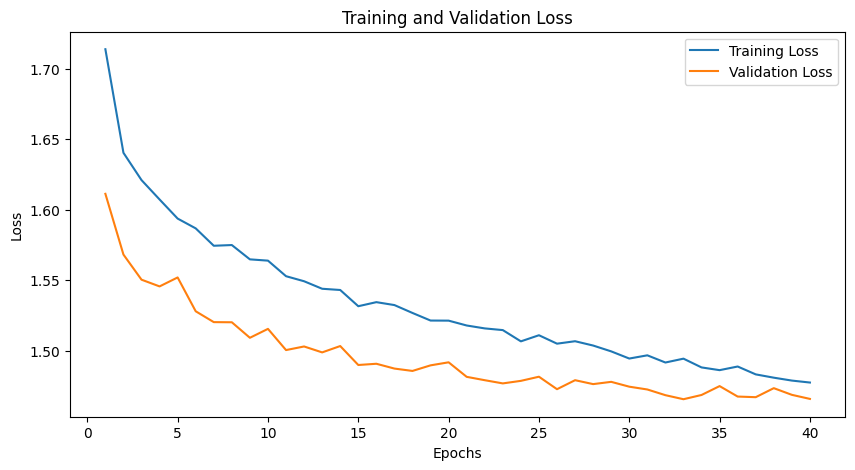

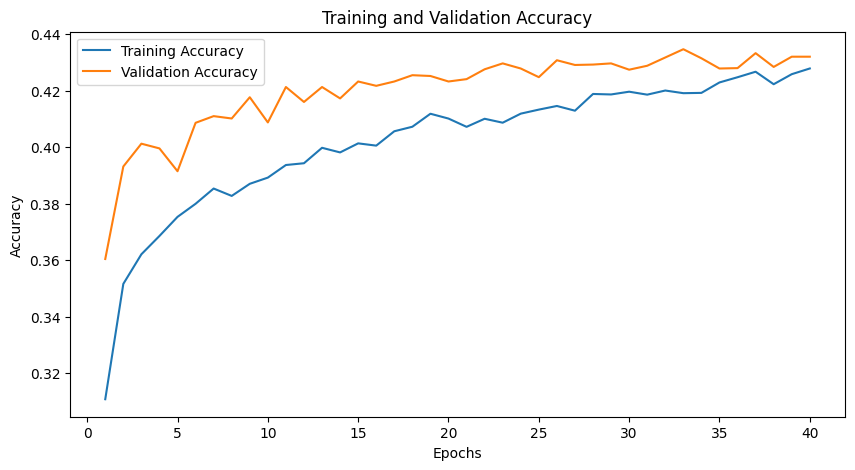

In [ ]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
model_json = model.to_json()
with open("model_arch3.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model3.h5")
print("Saved model to disk")

# Evaluate the model on test set
score = model.evaluate(x_test,
                       y_test,
                       verbose=0)

y_pred = model.predict(x_test)
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Print test loss
print('\nTest loss:', score[0])
# Print test accuracy
print('\n', 'Test accuracy:', score[1])

Saved model to disk
225/225 [==============================] - 3s 12ms/step
Confusion Matrix:
[[ 267   96  258  180  115   42    0]
 [  88  241  264  167  120  144    0]
 [  89   89 1233  208   96   58    1]
 [  88   79  368  570   82   46    0]
 [ 133  118  385  276  304   31    0]
 [  35   84  126   87   15  484    0]
 [  20   20   34   20   11    4    2]]

Test loss: 1.4657459259033203

 Test accuracy: 0.43201449513435364


<Figure size 640x480 with 0 Axes>

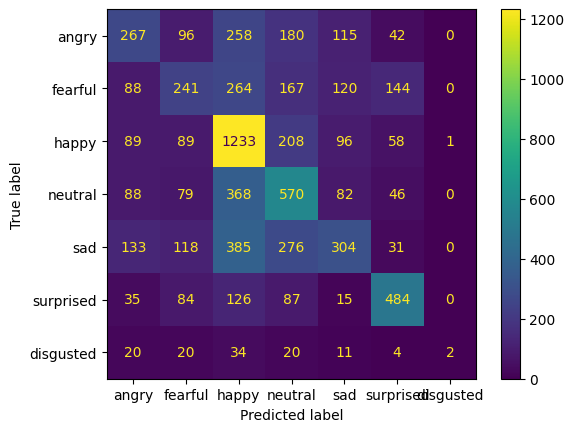

In [ ]:
plt.figure()
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["angry", "fearful", "happy", "neutral", "sad", "surprised", "disgusted"])
disp.plot()
plt.show()

## Real time with webcam

In [ ]:
model = model_from_json(open("model_arch1.json", "r").read())
model.load_weights('model1.h5')

In [ ]:
face_haar_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [ ]:
cap=cv2.VideoCapture(0)

while True:
    res,frame=cap.read()
    cv2.imshow('frame', frame)
    height, width , channel = frame.shape
    sub_img = frame[0:int(height/6),0:int(width)]

    black_rect = np.ones(sub_img.shape, dtype=np.uint8)*0
    res = cv2.addWeighted(sub_img, 0.77, black_rect,0.23, 0)
    FONT = cv2.FONT_HERSHEY_SIMPLEX
    FONT_SCALE = 0.8
    FONT_THICKNESS = 2
    lable_color = (10, 10, 255)
    lable = "Emotion Detection"
    lable_dimension = cv2.getTextSize(lable,FONT ,FONT_SCALE,FONT_THICKNESS)[0]
    textX = int((res.shape[1] - lable_dimension[0]) / 2)
    textY = int((res.shape[0] + lable_dimension[1]) / 2)
    cv2.putText(res, lable, (textX,textY), FONT, FONT_SCALE, (0,0,0), FONT_THICKNESS)
    gray_image= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_haar_cascade.detectMultiScale(gray_image)
    try:
        for (x,y, w, h) in faces:
            cv2.rectangle(frame, pt1 = (x,y),pt2 = (x+w, y+h), color = (255,0,0),thickness =  2)
            roi_gray = gray_image[y-5:y+h+5,x-5:x+w+5]
            roi_gray=cv2.resize(roi_gray,(48,48))
            image_pixels = img_to_array(roi_gray)
            image_pixels = np.expand_dims(image_pixels, axis = 0)
            image_pixels /= 255
            predictions = model.predict(image_pixels)
            max_index = np.argmax(predictions[0])
            emotion_detection = ('angry', 'fear', 'happy', 'sad', 'surprise', 'neutral')
            emotion_prediction = emotion_detection[max_index]
            cv2.putText(res, "Sentiment: {}".format(emotion_prediction), (0,textY+22+5), FONT,0.7, lable_color,2)
            lable_violation = 'Confidence: {}'.format(str(np.round(np.max(predictions[0])*100,1))+ "%")
            violation_text_dimension = cv2.getTextSize(lable_violation,FONT,FONT_SCALE,FONT_THICKNESS )[0]
            violation_x_axis = int(res.shape[1]- violation_text_dimension[0])
            cv2.putText(res, lable_violation, (violation_x_axis,textY+22+5), FONT,0.7, lable_color,2)
    except :
        pass
    frame[0:int(height/6),0:int(width)] =res
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows

AttributeError: ignored